1) Procederemos a cargar la información desde el archivo CSV llamado "Netflix titles 2021", para ello cargamos la librería pandas y llamamos el archivo mediante una función de esa librería utilizando "pd.read_csv"

In [143]:
import pandas as pd
df = pd.read_csv("C:/Users/cesgo/Downloads/netflix_titles_2021.csv")

2) Conforme realizamos la carga del archivo, realizaremos el análisis exploratorio de datos.

a) Primera visualización de datos, apoyado de la función ".head()"

In [144]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


b) Ya con nuestro primer análisis de data, podemos determinar que la cantidad de columnas son 12 y las filas son 8807, en donde lo relevante a destacar que existen datos nulos, en las columnas director,cast,country,date_added,rating y duration. 

Dentro de los cuales, la variable que representa mayor cantidad de valores nulos, es director con casi un 30% de la cantidad de datos totales, es por ello que no será considerada en nuestros análisis.

Por otro lado, debemos corregir las variables de tiempo que se encuentran tratadas como object e int64 que corresponden a date_added y release_year.

In [145]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
(8807, 12)


In [146]:
df['date_added']= pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['release_year']=df['release_year'].astype(int)

In [147]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [148]:
df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

In [149]:
df['country']=df['country'].fillna('Unknown')

c) Confirmamos que en nuestro análisis, no existen valores duplicados.

In [150]:
df.duplicated().sum()

0

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int32         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 791.4+ KB


d) Comenzamos la búsqueda de las variables a estudiar, confirmamos que las variables de intéres son "Country", "Release_year", "Type" y"Rating"... variables que se veían interesantes en un principio como "listed in" fueron descartados ya que no tiene una agrupación definida de las categorías como tal.

In [152]:
df['country'].describe(include=object)


count              8807
unique              749
top       United States
freq               2818
Name: country, dtype: object

In [153]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [154]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [155]:
df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

e) Consideramos que la variable rating, podría agregar valor a nuestro estudio... por ende al proceder a analizarla existen 3 valores que corregiremos que es que existen 3 valores que no corresponden al tipo de rating y serán clasificados como "NAN".

In [156]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [157]:
df['rating']=df['rating'].replace(['74 min','84 min','66 min'], 'Unrated')

In [158]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Unrated        3
UR             3
Name: count, dtype: int64

3) Empezamos a gráficar las variables de estudio

a) Cantidad de películas y TV shows por año

b) Top 10 de países (origen) con más cantidad de películas y tv shows desarrollados en netflix

c) Comparativa, de los Top 5 países comparando la frecuencia producida entre películas y tv shows.

d) Distribución de tipo de Rating más producido a nivel global

e) Comparación a lo largo de los años de TVMAS versus PG-13

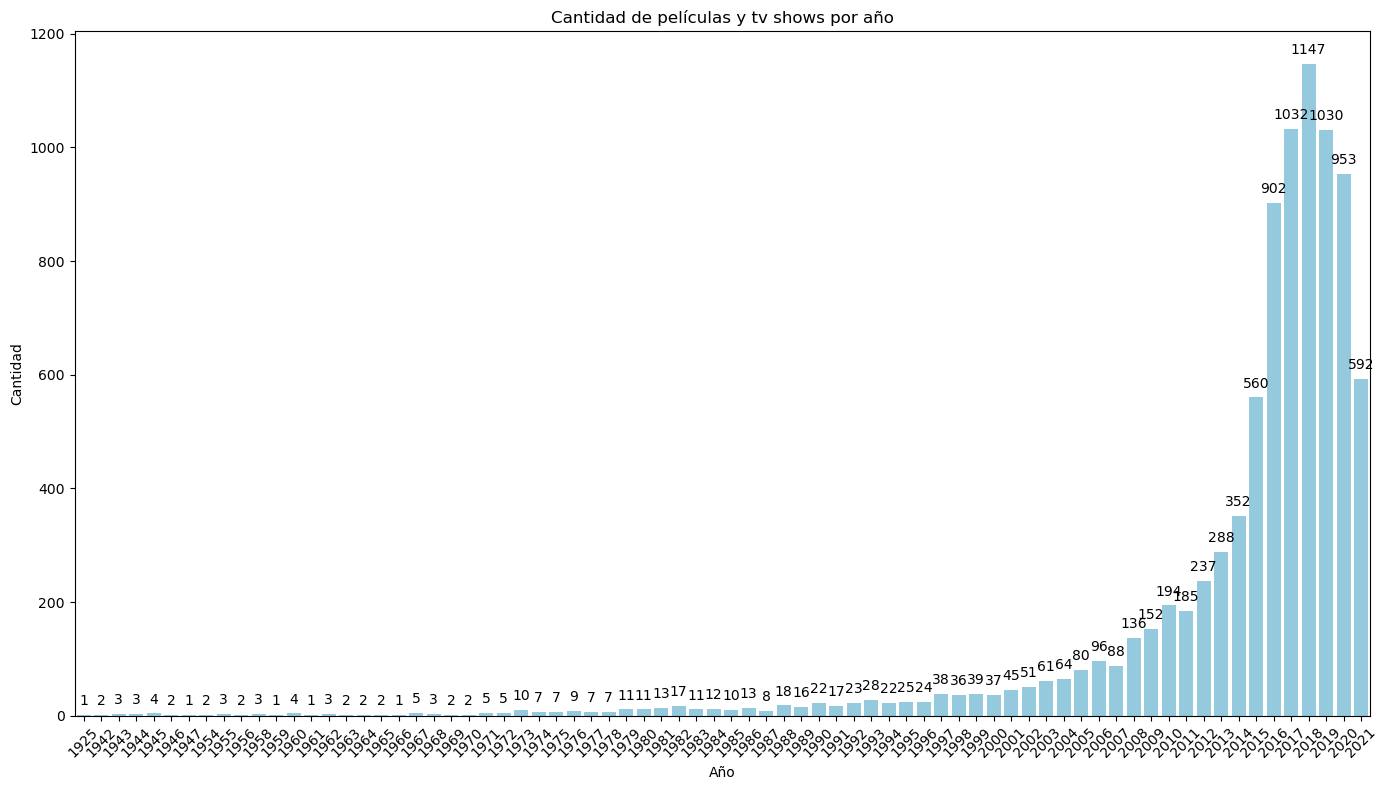

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

lanzamiento=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(14,8))
az=sns.barplot(x=lanzamiento.index, y=lanzamiento.values, color='skyblue')
for container in az.containers:
    az.bar_label(container, padding=5)

plt.title('Cantidad de películas y tv shows por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

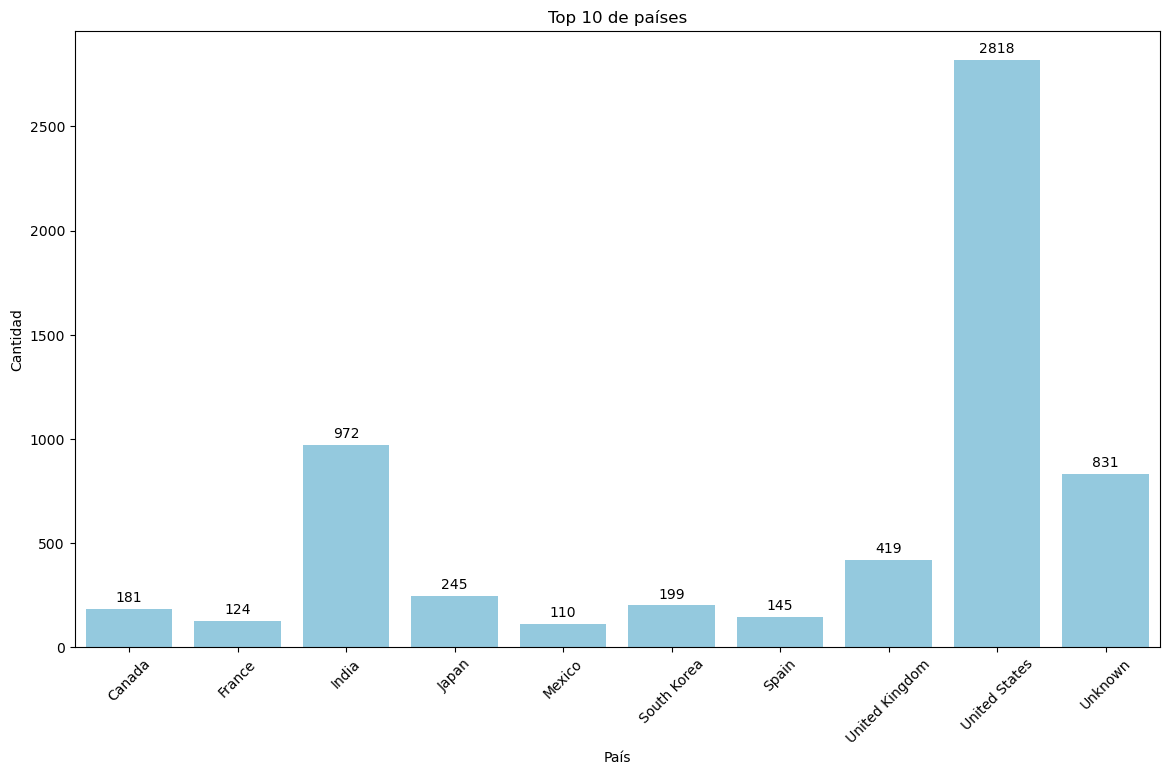

In [160]:
pais=df['country'].value_counts().head(10).sort_index()

plt.figure(figsize=(14,8))
ax=sns.barplot(x=pais.index, y=pais.values, color='skyblue')
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.title('Top 10 de países')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

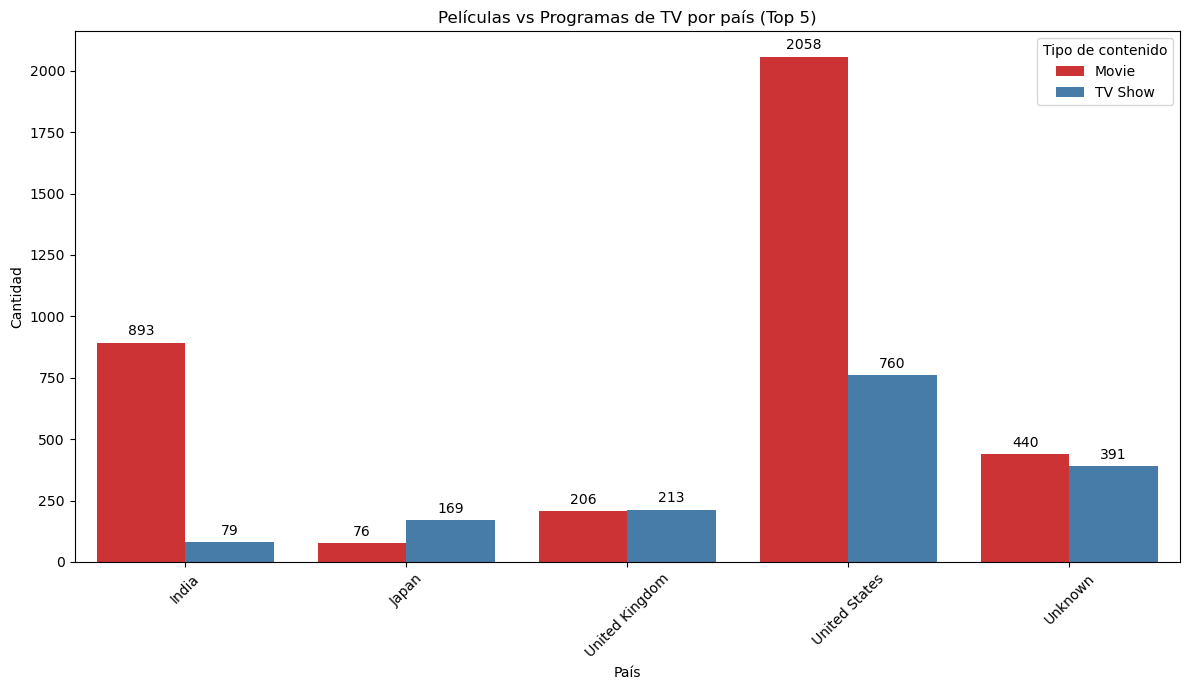

In [161]:

versus = df.groupby(['country', 'type']).size().reset_index(name='cantidad')

top_paises = df['country'].value_counts().head(5).index
conteo_top_paises = versus[versus['country'].isin(top_paises)]

plt.figure(figsize=(12, 7))
ax=sns.barplot(data=conteo_top_paises, x='country', y='cantidad', hue='type', palette='Set1')
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.title('Películas vs Programas de TV por país (Top 5)')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de contenido')
plt.tight_layout()
plt.show()

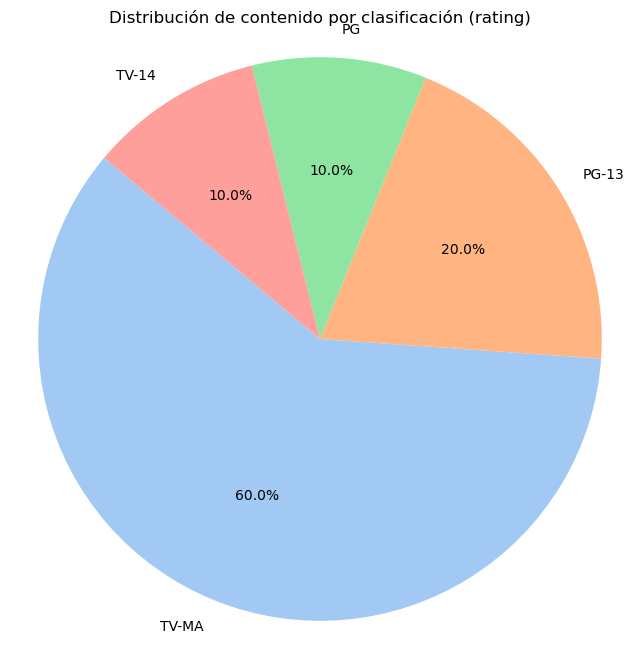

In [162]:
tipo_programa = df['rating'].head(10).value_counts()
plt.figure(figsize=(8, 8))
plt.pie(tipo_programa, 
        labels=tipo_programa.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))

plt.title('Distribución de contenido por clasificación (rating)')
plt.axis('equal')  
plt.show()

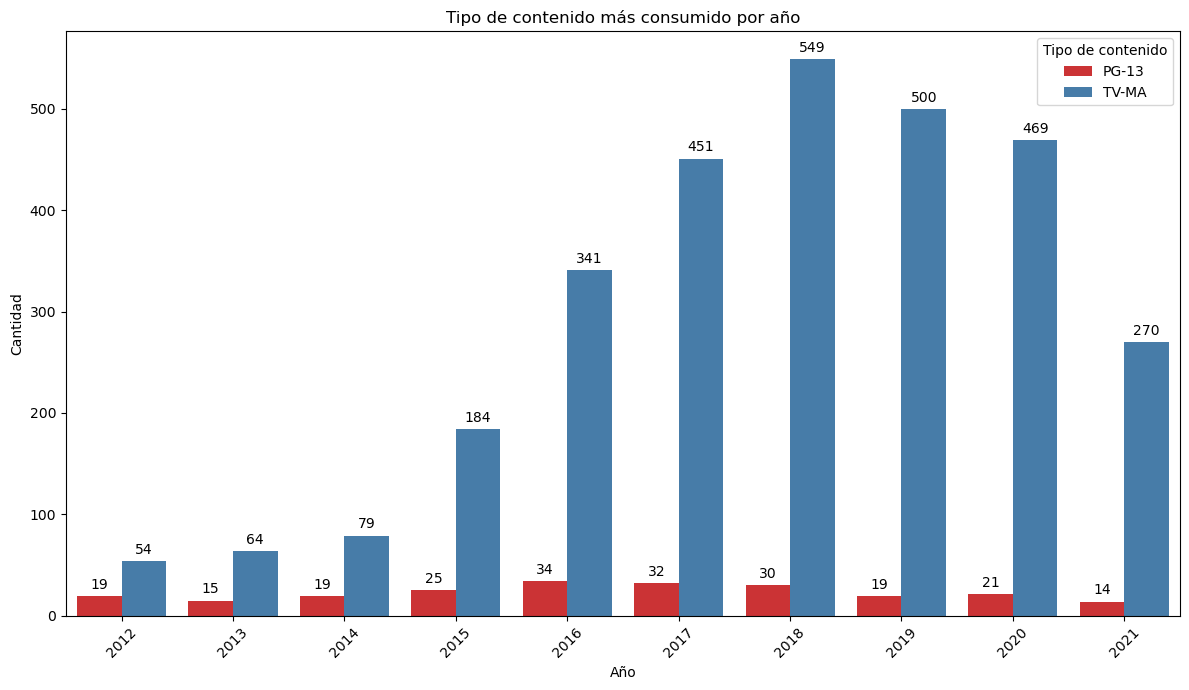

In [163]:
categorias_deseadas = ['TV-MA','PG-13']
filtro_rating = df[df['rating'].isin(categorias_deseadas)]

rating = filtro_rating.groupby(['release_year', 'rating']).size().reset_index(name='cantidad')
top_rating = filtro_rating['release_year'].value_counts().head(10).index
df_rating = filtro_rating[filtro_rating['release_year'].isin(top_rating)]

conteo = df_rating.groupby(['release_year', 'rating']).size().reset_index(name='cantidad')


plt.figure(figsize=(12, 7))
af=sns.barplot(data=conteo, x='release_year', y='cantidad', hue='rating', palette='Set1')
for container in af.containers:
    af.bar_label(container, padding=3)


plt.title('Tipo de contenido más consumido por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de contenido')
plt.tight_layout()
plt.show()





4. Conclusiones

1) Según la tabla de distribución de páises con más películas y tv shows, podemos decir que los países con mayor cantidad son Estados Unidos, seguido de la India y Reino Unido.
2) Dentro de la data observada en 2018, tuvo el peak de producciones, con 1147 producciones de un total de 8807, es decir representa un 13% de la producción total.
3) Se evidencia, que la mayor cantidad a nivel mundial de audiencia de netflix que se encuentra enfocada en contenido para mayores (al menos un 80% del contenido total producido), ya que TVMA y PG-13 que es el tipo de contenido, equivale a contenido para mayores o con niños mayores de 13 años con supervisión parental.
4) Otro dato relevante, es que el contenido PG-13 se ha mantenido a lo largo de los años, pese al creicmiento y varianza que ha tenido TVMA.